### Problem Statement 

With the exponential increase in the amount of digital information over the internet, online shops, online music,
video and image libraries, search engines and recommendation system have become the most convenient
ways to find relevant information within a short time.  Recommendations can be generated based on user
preferences, item features, user-item transactions, and other environmental factors such as time, season, location. In recommendation literature these are categorized into three primary categories: 
- `collaborative filtering (using only the user-item interaction information for recommendation)`, 
- `content based (using user preferences, item preferences or both)`  and 
- `hybrid recommendation models (using both interaction information as well as user and item metadata)`.

Models under each of these categories have their own limitations such as `data sparsity`, `cold start` for `users` and
`items`.  

The study, published in the Journal of the Academy of Marketing Science, found that when a movie is first released it is the "star power" of a popular actor that has a strongest impact at the box office. However, if the movie has been out for a while, the pull of a popular star tends to wane whereas the influence of an actor who has been recognised for their acting abilities remains steady. 

- In fact, choosing a film where the main actor has received awards and recognition for acting is one of the best predictors of movie success

- The other key factor in predicting whether moviegoers will be sitting on the edge of their power-reclining seats is reviews, both by professional movie critics and the general public.

- So if you want to improve your chances of picking a great movie, make sure it has a popular actor – preferably someone who has won an Oscar. 


### According to `Box Office`, factors that contribute to the Success of a Movie:

- Storyline (Compelling Storyline)
- Script (Well written Script)
- Grat Actors (Who have a reach to the Audience)
- Visionary Director
- Director of photography
- Editor
- Budget  (Good Budget)
- Movie Marketing Campaign
- Studio
- Ratings
- Viewers like
- Release Date
- Genre Popularity
- Movie Star Popularity
- Release Schedule
- Duration

### Keys things we need to look into in our Analysis:

- Reviews aganist the Budget, Revenue
- High profile Stars(actors) compared to Directors, Genre, Budget, Revenue, production companies.
- Language (Which language is most watched/viewed)
- Genre aganist the Budget, Revenue
- Budget (If a high Budget yeilds a considerable amount of Revenue)
- Check for % Gross Profit, % Return on Investment.
- Movies high actors featured in, was there a high ROI?
- Was the title / language of the movie have any impact on Reviews, vote average and vote count?
- Check for the kind of Reviews gotten from a movie featuring High Profile actors
- How much impact does the keyword play on Reviews, vote avergae and vote count.
- See if the Runtime has any impact on Budget, Revenue, vote count, vote average, etc.
- See what can be gotten from the release date, does the timing affect some couple of things?
- Popularity of the movie and the key role it plays in general overview.
- Production companies with the highest Budget, Revenue, Movies, and vice versa, etc.
- Revenue as a major factor, get some insights from it.
- From the crew's job title, can you categorize the Films by type? (i.e. Animated or not?)
- Status as it relates to the Movies
- Get some insights from the vote average and vote count.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

#### Import Required Packges

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np

import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
from wordcloud import WordCloud

import math, nltk, warnings
from nltk.corpus import wordnet
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')
PS = nltk.stem.PorterStemmer()

In [3]:
import os
from six.moves import urllib

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_IMAGE_ID = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, PROJECT_IMAGE_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Import the dataset

In [4]:
movies = pd.read_csv("tmdb_5000_movies.csv/tmdb_5000_movies.csv")

In [5]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


The `movies dataset` has the following features:-
- `budget` - The budget in which the movie was made.
- `genre` - The genre of the movie, Action, Comedy ,Thriller etc.
- `homepage` - A link to the homepage of the movie.
- `id` - This is infact the movie_id as in the first dataset.
- `keywords` - The keywords or tags related to the movie.
- `original_language` - The language in which the movie was made.
- `original_title` - The title of the movie before translation or adaptation.
- `overview` - A brief description of the movie.
- `popularity` - A numeric quantity specifying the movie popularity.
- `production_companies` - The production house of the movie.
- `production_countries` - The country in which it was produced.
- `release_date` - The date on which it was released.
- `revenue` - The worldwide revenue generated by the movie.
- `runtime` - The running time of the movie in minutes.
- `status` - "Released" or "Rumored".
- `tagline` - Movie's tagline.
- `title` - Title of the movie.
- `vote_average` - average ratings the movie recieved.
- `vote_count` - the count of votes recieved.

In [6]:
credits = pd.read_csv("tmdb_5000_credits.csv/tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The `credits dataset` contains the following features:-
- `movie_id` - A unique identifier for each movie.
- `cast` - The name of lead and supporting actors.
- `title` - Title of the movie.
- `crew` - The name of Director, Editor, Composer, Writer etc.

- The little problem with this dataset is the `.json format`. The `JSON(JavaScript Object Notation)` is basically a syntax for storing and exchanging data between two computers. It is mainly in a `key:value format`, and is embedded into a string. Many columns in the dataset are in this `json format`, therefore cleaning and reformatting is a neccessity.

#### Let's merge the `credits` and `movies` dataset on the 'id' column

In [7]:
credits.columns = ['id','title', 'cast','crew']
dataset = movies.merge(credits, on="id")

In [8]:
dataset.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


- Having a closer look at this dataset, you'll notice that the following columns are in the JSON format:
    - `genres`,
    - `keywords`,
    - `production_companies`,
    - `production_countries`,
    - `spoken_languages`,
    - `cast`,
    - `crew`
- We need to convert these columns into a format that can be easily read and interpreted.  

In [9]:
def load_movies_to_str(data):
    df = data
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries','cast','crew',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)

    return df

In [10]:
load_movies_to_str(dataset)
dataset.shape

(4803, 23)

In [11]:
dataset.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."


In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [13]:
dataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [14]:
dataset.iloc[50]

budget                                                          150000000
genres                  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
homepage                http://disney.go.com/disneypictures/princeofpe...
id                                                                   9543
keywords                [{'id': 1241, 'name': 'persia'}, {'id': 1965, ...
original_language                                                      en
original_title                        Prince of Persia: The Sands of Time
overview                A rogue prince reluctantly joins forces with a...
popularity                                                        62.1699
production_companies    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
production_countries    [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                   2010-05-19
revenue                                                         335154643
runtime                               

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Checking and Dealing with Missing Values

In [16]:
# Check for the number of columns containing missing values
print("No of Columns with Nan / missing values in our dataframe : ", sum(dataset.isnull().any()))

No of Columns with Nan / missing values in our dataframe :  5


In [17]:
dataset.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [18]:
# info on variable types and filling factor
column_info = pd.DataFrame(dataset.dtypes).T.rename(index={0:'column type'})
column_info = column_info.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index={0:'null values'}))
column_info = column_info.append(pd.DataFrame(dataset.isnull().sum()/dataset.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
column_info

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
column type,int64,object,object,int64,object,object,object,object,float64,object,object,object,int64,float64,object,object,object,object,float64,int64,object,object,object
null values,0,0,3091,0,0,0,0,3,0,0,0,1,0,2,0,0,844,0,0,0,0,0,0
null values (%),0,0,64.3556,0,0,0,0,0.062461,0,0,0,0.0208203,0,0.0416406,0,0,17.5724,0,0,0,0,0,0


- the `homepage` has total missing value of `3091` and `tagline` has total missing value of `844`.

- The Fields in JSON format can be accessed just like any other list or dictionary

In [19]:
# The cast field contains the following keys:
print(sorted(dataset.cast.iloc[1][1].keys()))

['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order']


In [20]:
# The genre field contains these keys:
print(sorted(dataset.genres.iloc[1][1].keys()))

['id', 'name']


In [21]:
# The crew field contains these keys:
print(sorted(dataset.crew.iloc[0][0].keys()))

['credit_id', 'department', 'gender', 'id', 'job', 'name']


In [22]:
# The keywords field contains these keys:
print(sorted(dataset.keywords.iloc[0][0].keys()))

['id', 'name']


In [23]:
# The production_companies field contains these keys:
print(sorted(dataset.production_companies.iloc[0][0].keys()))

['id', 'name']


In [24]:
# The production_countries field contains these keys:
print(sorted(dataset.production_countries.iloc[0][0].keys()))

['iso_3166_1', 'name']


In [25]:
# The spoken languages field contains these keys:
print(sorted(dataset.spoken_languages.iloc[0][0].keys()))

['iso_639_1', 'name']


- The cast and crew lists are already sorted by the order of appeareance in the film's dataset. We can get the names of the first five actors in `Avatar` with:

In [26]:
dataset['original_title'].iloc[:10]

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
5                                Spider-Man 3
6                                     Tangled
7                     Avengers: Age of Ultron
8      Harry Potter and the Half-Blood Prince
9          Batman v Superman: Dawn of Justice
Name: original_title, dtype: object

In [27]:
dataset['cast'].iloc[0][:5]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4}]

In [28]:
[actor['name'] for actor in dataset['cast'].iloc[0][:5]]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [29]:
# new code block
def safe_access(container, index_values):
    # return missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

- From the above list of cast for Avatar, We can possibly see that the gender is trinary `({other: 0, female: 1, male: 2})`. To get a better insight from this, we can create a column for the gender

In [30]:
dataset['gender_of_lead'] = dataset.cast.apply(lambda x: safe_access(x, [0, 'gender']))
dataset['lead'] = dataset.cast.apply(lambda x: safe_access(x, [0, 'name']))
dataset.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,gender_of_lead,lead
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",2.0,Sam Worthington
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2.0,Johnny Depp
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",2.0,Daniel Craig


In [31]:
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'original_title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

In [32]:
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])

def pipe_flatten_names(keywords):
    return ','.join([x['name'] for x in keywords])


def convert_to_ideal_format(dataset):
    df_format = dataset.copy()
    df_format.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    df_format['release_year'] = pd.to_datetime(df_format['release_date']).apply(lambda x: x.year)
    df_format['release_month'] = pd.to_datetime(df_format['release_date']).apply(lambda x: x.month)
    
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    df_format['country'] = df_format['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    df_format['language'] = df_format['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    df_format['director_name'] = df_format['crew'].apply(get_director)
    df_format['actor_1_name'] = df_format['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    df_format['actor_2_name'] = df_format['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    df_format['actor_3_name'] = df_format['cast'].apply(lambda x: safe_access(x, [3, 'name']))
    df_format['genres'] = df_format['genres'].apply(pipe_flatten_names)
    df_format['crew'] = df_format['crew'].apply(pipe_flatten_names)
    df_format['plot_keywords'] = df_format['plot_keywords'].apply(pipe_flatten_names)
    df_format['production_companies'] = df_format['production_companies'].apply(pipe_flatten_names)
    return df_format

In [33]:
df_initial = convert_to_ideal_format(dataset)
print('Shape:',df_initial.shape)

Shape: (4803, 32)


In [34]:
df_initial.head(3)

,budget,genres,homepage,id,plot_keywords,language,movie_title,overview,popularity,production_companies,production_countries,release_date,revenue,duration,spoken_languages,status,tagline,title_x,vote_average,num_voted_users,title_y,cast,crew,gender_of_lead,lead,release_year,release_month,country,director_name,actor_1_name,actor_2_name,actor_3_name
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","Stephen E. Rivkin,Rick Carter,Christopher Boye...",2.0,Sam Worthington,2009.0,12.0,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","Dariusz Wolski,Gore Verbinski,Jerry Bruckheime...",2.0,Johnny Depp,2007.0,5.0,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","Thomas Newman,Sam Mendes,Anna Pinnock,John Log...",2.0,Daniel Craig,2015.0,10.0,United Kingdom,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes


In [35]:
# info on variable types and filling factor
new_column_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
new_column_info = new_column_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
new_column_info = new_column_info.append(round(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100)).T.
                                          rename(index={0:'null values (%)'}))
new_column_info.T

,column type,null values,null values (%)
budget,int64,0,0
genres,object,0,0
homepage,object,3091,64
id,int64,0,0
plot_keywords,object,0,0
language,object,86,2
movie_title,object,0,0
overview,object,3,0
popularity,float64,0,0
production_companies,object,0,0


#### Filling factor: missing values

- This is to help us determine the amount of data missing in every variable :

In [36]:
df_initial.shape[0]

4803

In [37]:
# Get the percentage of filling factor, number of missing count, and their respective column names
df_missing = df_initial.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing['filling_factor'] = (df_initial.shape[0] 
                                - df_missing['missing_count']) / df_initial.shape[0] * 100
df_missing.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,gender_of_lead,43,99.104726
8,lead,43,99.104726
9,director_name,30,99.375390


- Most of our variables are `well filled`, only two have a filling factor below `93%`.

### Keywords

- The Keywords which describes the movies would be extensively used for this work. By convention, movies described by similar keywords should apprently have homogenous contents. We would take a closer look of how Keywords are defined and characterized. 

In [38]:
df_initial.plot_keywords

0       culture clash,future,space war,space colony,so...
1       ocean,drug abuse,exotic island,east india trad...
2       spy,based on novel,secret agent,sequel,mi6,bri...
3       dc comics,crime fighter,terrorist,secret ident...
4       based on novel,mars,medallion,space travel,pri...
                              ...                        
4798    united states–mexico barrier,legs,arms,paper k...
4799                                                     
4800    date,love at first sight,narration,investigati...
4801                                                     
4802                 obsession,camcorder,crush,dream girl
Name: plot_keywords, Length: 4803, dtype: object

In [39]:
keywords_set = set()
for liste_keywords in df_initial['plot_keywords'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    keywords_set = keywords_set.union(liste_keywords)

- A function that counts a number of times each of them appear

In [40]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue

        for s in [s for s in liste_keywords if s in liste]:
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [41]:
keyword_occurences, dum = count_word(df_initial, 'plot_keywords', keywords_set)
keyword_occurences[:5]

[['', 412],
 ['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197]]

In [42]:
keyword_occurences = [x for x in keyword_occurences if x[0]]
keyword_occurences[:20]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189],
 ['aftercreditsstinger', 170],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 126],
 ['revenge', 118],
 ['sex', 111],
 ['friendship', 106],
 ['biography', 105],
 ['musical', 105],
 ['teenager', 99],
 ['3d', 98],
 ['love', 95],
 ['sequel', 94],
 ['suspense', 92],
 ['new york', 89]]

- Having created the list of keywords, this gives us an idea of the number of items each of them appear in the dataset and as well gives us the feeling of the content of the most popular movies. The wordcloud package which helps to visualize this information in a fancy manner was used and all the words are arranged in a figure with the sizes that depend on their respective frequencies. Histogram is as well used to relay this information, giving us a better representation where the keywords are ordered by occurence, the number of times they appear, etc. 

In [43]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

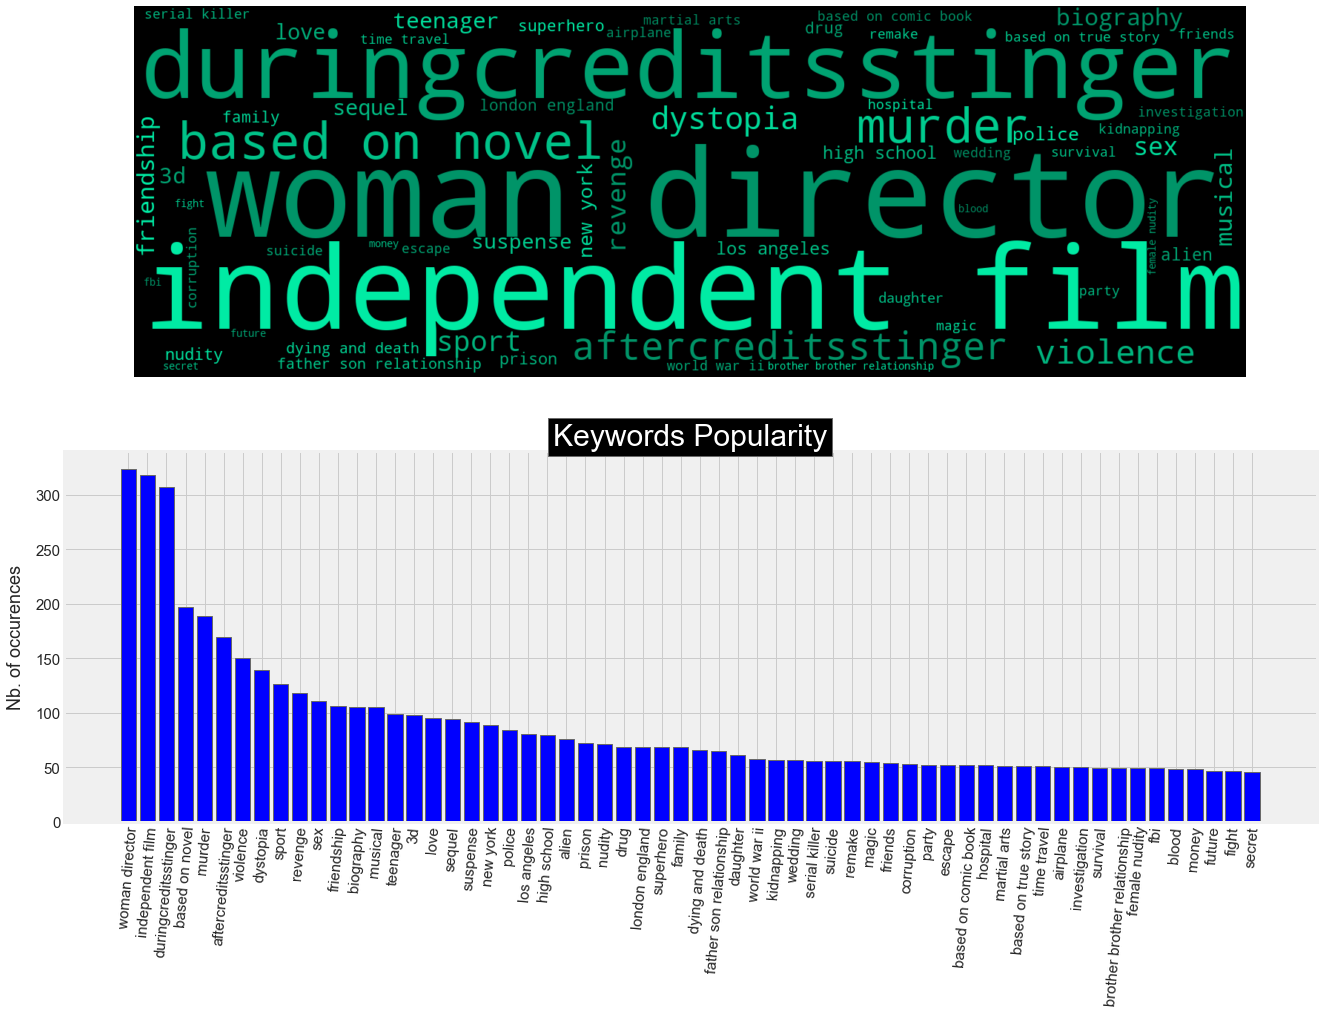

In [44]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(20,15))
ax1 = fig.add_subplot(2,1,1)

# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:60]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 880.0 # define the color of the words


wordcloud = WordCloud(width=1500,height=500, background_color='black', 
                      max_words=2000,relative_scaling=1,stopwords=STOPWORDS,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='b')


plt.title("Keywords Popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

### Genres

- The Genre variable describes the content of the film (i.e. Drama, Comedy, Action, ...), and is a very important feature for building our Movie Success system.

- To see exactly which genres are the most popular, We will use the WordCloud to show this..

In [45]:
genre_labels = set()
for s in df_initial['genres'].astype(str).str.split(',').values:
    genre_labels = genre_labels.union(set(s))

In [46]:
# counting how many times each of them occur:
genre_occurences, dum = count_word(df_initial, 'genres', genre_labels)
genre_occurences[:5]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894]]

In [47]:
# drop entries with no keywords to prevent a null error in the next plot.
genre_occurences = [x for x in genre_occurences if x[0]]

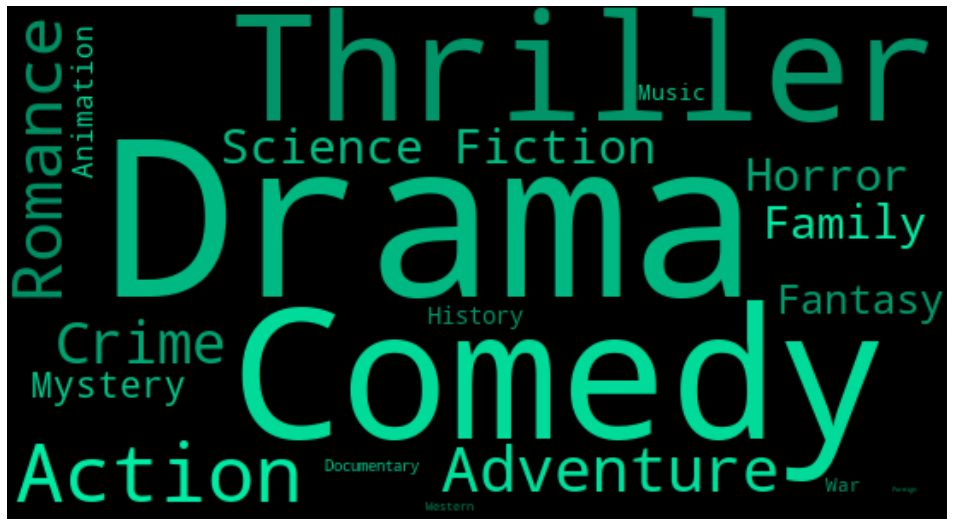

In [48]:
words = dict()
trunc_occurences = genre_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 880 # define the color of the words
f, ax = plt.subplots(figsize=(15, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
df_initial['genres'] = df_initial['genres'].astype(str).str.strip('[]').str.replace(' ','').str.replace("'",'')
df_initial['genres'] = df_initial['genres'].astype(str).str.split(',')

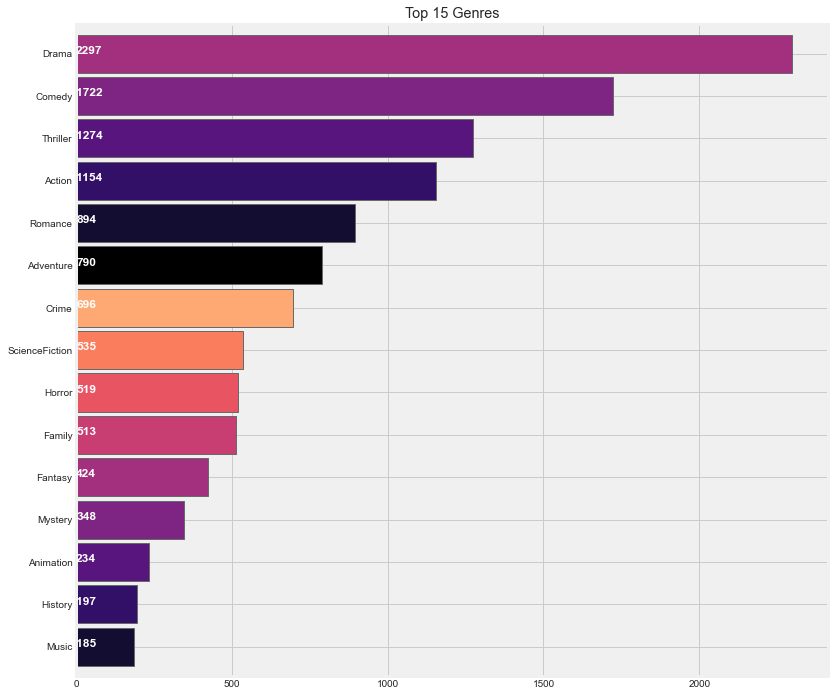

In [50]:
plt.subplots(figsize=(12,12))
list1=[]
for i in df_initial['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:15].sort_values(ascending=True). \
                            plot.barh(width=0.9,color=sns.color_palette("magma",10))

for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('k')
plt.title('Top 15 Genres')
plt.show()

- The Horizontal bar graph above represents the horizontal count/occurence of each Genre of Movie, it's bars are drawn horizontally, where the data categories are shown on the vertical axis and the data values are shown on the horizontal axis. 

In [51]:
for i,j in zip(df_initial['genres'],df_initial.index):
    list2=[]
    list2=i
    list2.sort()
    df_initial.loc[j,'genres']=str(list2)
df_initial['genres']=df_initial['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df_initial['genres']=df_initial['genres'].str.split(',')

In [52]:
genre_list = []
for index, row in df_initial.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genre_list:
            genre_list.append(genre)

In [53]:
# List of Unique genres 
genre_list[:20] # output 20

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TVMovie']

In [54]:
df_init = df_initial[['movie_title', 'genres', 'language']].sort_values(by='movie_title', ascending=True)[:10]
df_init

,movie_title,genres,language
4257,#Horror,"[Drama, Horror, Mystery, Thriller]",English
4142,$upercapitalist,[Thriller],English
3339,(500) Days of Summer,"[Comedy, Drama, Romance]",English
4585,...E tu vivrai nel terrore! L'aldilà,[Horror],English
3556,10 Cloverfield Lane,"[Drama, ScienceFiction, Thriller]",English
2903,10 Days in a Madhouse,[Drama],English
2739,10 Things I Hate About You,"[Comedy, Drama, Romance]",English
393,102 Dalmatians,"[Comedy, Family]",English
3293,10th & Wolf,"[Action, Crime, Drama, Mystery, Thriller]",English
3504,11:14,"[Crime, Drama, Thriller]",English


- 'Genre_list' will now hold all the `genres`. But how do we come to know about the genres each movie falls into. Now some movies are  `Action`, some are `Action,Adventure`, etc. We need to classify the movies according to their genres. 

### Language

- Most watched/viewed Language used in a Movie
- This is a major factor for determining the success of a movie as well, as language spoken plays a major role in this.
- We'll see how this relates to other factors in the success of a movie

In [55]:
df_initial['language'][:].value_counts()

English             4102
Français             108
Español               84
Deutsch               61
العربية               33
Italiano              32
普通话                   32
Pусский               31
Český                 30
广州话 / 廣州話             28
日本語                   23
हिन्दी                22
Português             17
Dansk                 12
                      12
한국어/조선말                8
Latin                  8
עִבְרִית               6
Nederlands             6
Afrikaans              5
ελληνικά               5
svenska                5
Norsk                  4
ภาษาไทย                4
Română                 4
Magyar                 4
Polski                 3
Kiswahili              3
فارسی                  3
Tiếng Việt             2
தமிழ்                  2
No Language            2
Український            2
Bahasa indonesia       1
български език         1
Eesti                  1
shqip                  1
Esperanto              1
Galego                 1
Íslenska               1


In [56]:
language_df = df_initial['language'].value_counts()
language_df[:10]

English      4102
Français      108
Español        84
Deutsch        61
العربية        33
Italiano       32
普通话            32
Pусский        31
Český          30
广州话 / 廣州話      28
Name: language, dtype: int64

#### Replace all sign languages with their equivalent English names

In [57]:
df_initial['language'] = df_initial['language'].replace(['العربية', '普通话', 'Český', '广州话 / 廣州話', '日本語', 'हिन्दी', \
                        '한국어/조선말', 'עִבְרִית', 'ελληνικά', 'ภาษาไทย', 'فارسی', 'Український', 'Tiếng Việt', 'தமிழ்', 'اردو', \
                        'বাংলা'], ['Arabic', 'Mandarin', 'Czech', 'Cantonese / Cantonese', 'Japanese', 'Hindi', 'Korean, Korean language', \
                         'Abrit', 'Greek', 'Thai language', 'Farsi', 'Ukrainian', 'Vietnamese',\
                        'Tamil', 'Urdu', 'Bengali'])
df_initial['language'][:].value_counts()

English                    4102
Français                    108
Español                      84
Deutsch                      61
Arabic                       33
Mandarin                     32
Italiano                     32
Pусский                      31
Czech                        30
Cantonese / Cantonese        28
Japanese                     23
Hindi                        22
Português                    17
                             12
Dansk                        12
Latin                         8
Korean, Korean language       8
Abrit                         6
Nederlands                    6
Afrikaans                     5
svenska                       5
Greek                         5
Thai language                 4
Română                        4
Norsk                         4
Magyar                        4
Kiswahili                     3
Farsi                         3
Polski                        3
Tamil                         2
Vietnamese                    2
No Langu

In [58]:
language_df = df_initial['language'].value_counts()
language_df[:10]

English                  4102
Français                  108
Español                    84
Deutsch                    61
Arabic                     33
Mandarin                   32
Italiano                   32
Pусский                    31
Czech                      30
Cantonese / Cantonese      28
Name: language, dtype: int64

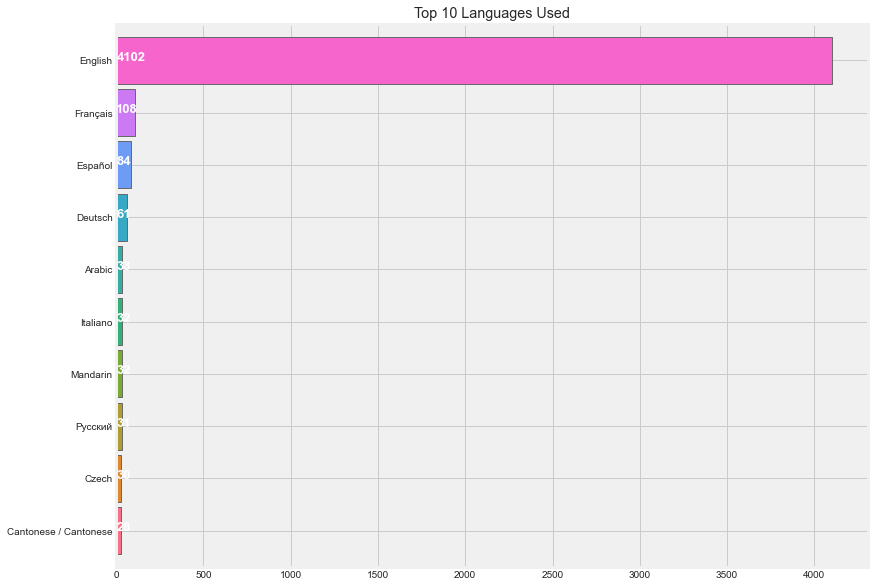

In [59]:
plt.subplots(figsize=(12,10))
ax = df_initial['language'].value_counts()[:10].sort_values(ascending=True). \
                            plot.barh(width=0.9,color=sns.color_palette("husl",10))

for i, v in enumerate(df_initial['language'].value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=13,color='white',weight='bold')
# ax.patches[9].set_facecolor('b')
plt.title('Top 10 Languages Used')
plt.show()

#### Check out the language of movies that had most Revenue returns

In [60]:
# Top 15 language and it's movies with the highest Revenue
df_movies = df_initial['movie_title']
df_lang = df_initial['language']
df_budget = df_initial['budget']
df_revenue = df_initial['revenue']

big_data_lang = pd.DataFrame(pd.concat([df_movies, df_lang, df_budget, df_revenue], names=['movies_title', 'language', 'budget', 'revenue'], \
                                 sort=True, axis=1))
big_data_lang = big_data_lang.sort_values(by=["revenue"], ascending=False)
big_data_lang[:15]

,movie_title,language,budget,revenue
0,Avatar,English,237000000,2787965087
25,Titanic,English,200000000,1845034188
16,The Avengers,English,220000000,1519557910
28,Jurassic World,English,150000000,1513528810
44,Furious 7,English,190000000,1506249360
7,Avengers: Age of Ultron,English,280000000,1405403694
124,Frozen,English,150000000,1274219009
31,Iron Man 3,English,200000000,1215439994
546,Minions,English,74000000,1156730962
26,Captain America: Civil War,Română,250000000,1153304495


In [61]:
# for index, row in big_data_lang.iterrows():
#     print(row['language'], row['revenue'])

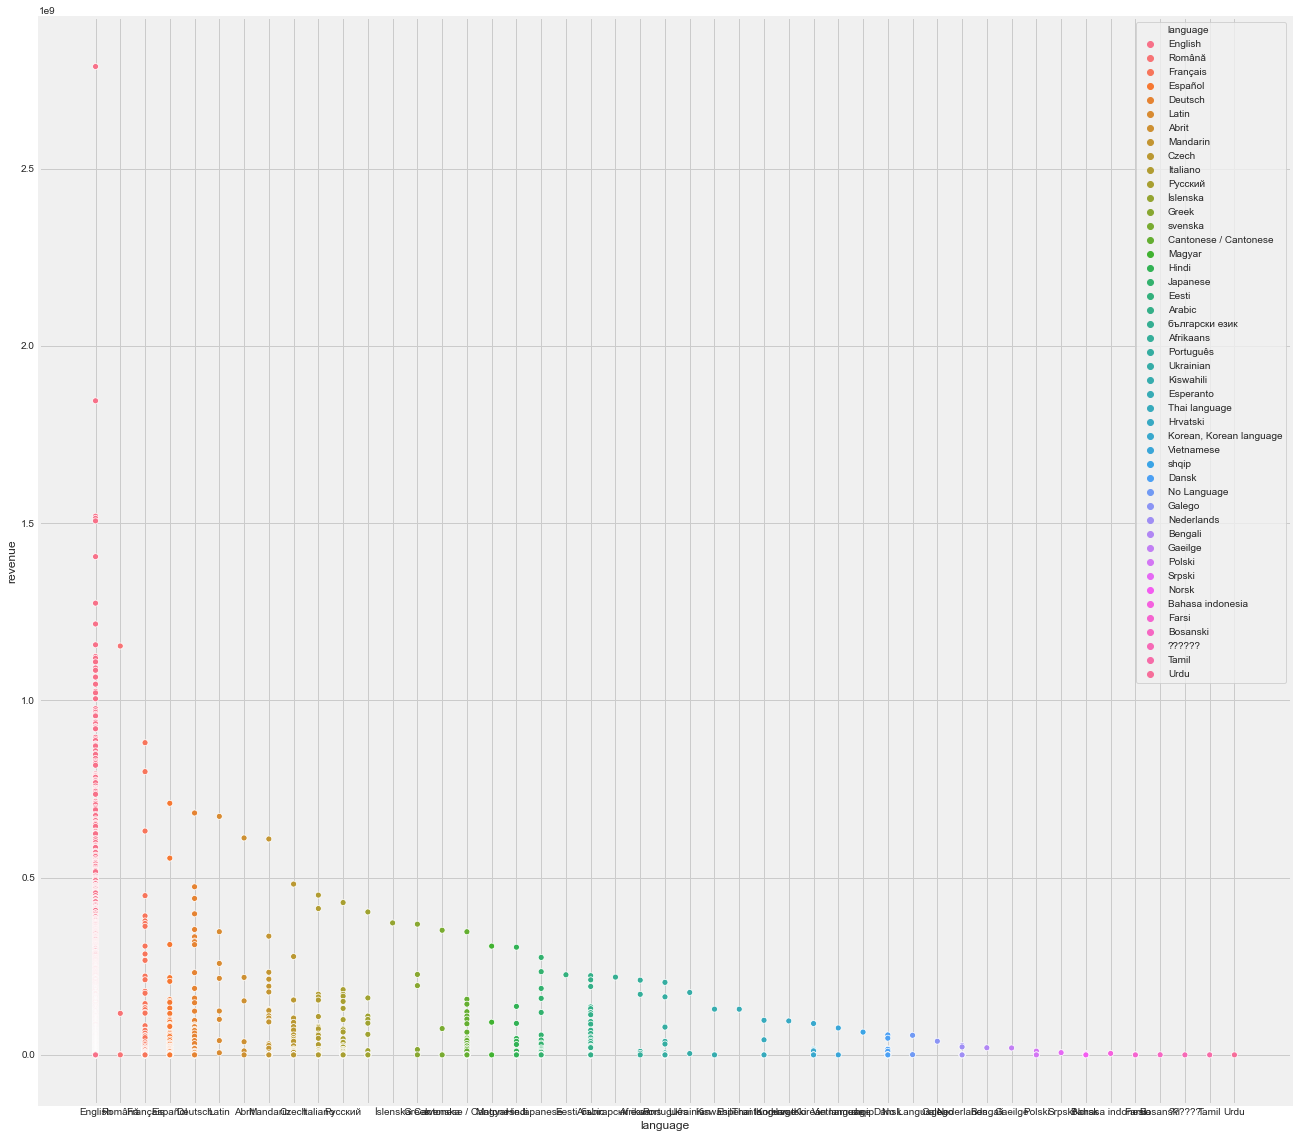

In [62]:
plt.figure(figsize=(20,20))
sns.scatterplot(data = big_data_lang, x = "language", y = "revenue", hue = "language")

plt.show()

In [63]:
# Last 15 languages with lowest Revenue
big_data_lang[-10:]

,movie_title,language,budget,revenue
3208,Star Wars: Clone Wars (Volume 1),English,0,0
3205,Beneath Hill 60,English,7347125,0
3204,The I Inside,English,8800000,0
3203,"Ultramarines: A Warhammer 40,000 Movie",English,0,0
3201,Veronika Decides to Die,English,9000000,0
3200,La Fille du RER,Français,0,0
3199,Red Riding: In the Year of Our Lord 1974,English,0,0
3197,Flammen & Citronen,Dansk,6500000,0
3194,All or Nothing,Arabic,9000000,0
4802,My Date with Drew,English,0,0


### Director

- Directors plays a key role to the success of movies
- Number of occurence of some Directors 
- The Movie they Directed and the Revenue made from each.

In [64]:
df_initial['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director_name, Length: 4803, dtype: object

In [65]:
director_labels = set()
for s in df_initial['director_name'].astype(str).str.split(',').values:
    director_labels = director_labels.union(set(s))

In [66]:
# counting how many times each of them occur:
director_occurences, dum = count_word(df_initial,'director_name', director_labels)
director_occurences[:15]

[['Steven Spielberg', 27],
 ['Woody Allen', 21],
 ['Clint Eastwood', 20],
 ['Martin Scorsese', 20],
 ['Ridley Scott', 16],
 ['Spike Lee', 16],
 ['Robert Rodriguez', 16],
 ['Renny Harlin', 15],
 ['Steven Soderbergh', 15],
 ['Oliver Stone', 14],
 ['Tim Burton', 14],
 ['Barry Levinson', 13],
 ['Joel Schumacher', 13],
 ['Robert Zemeckis', 13],
 ['Ron Howard', 13]]

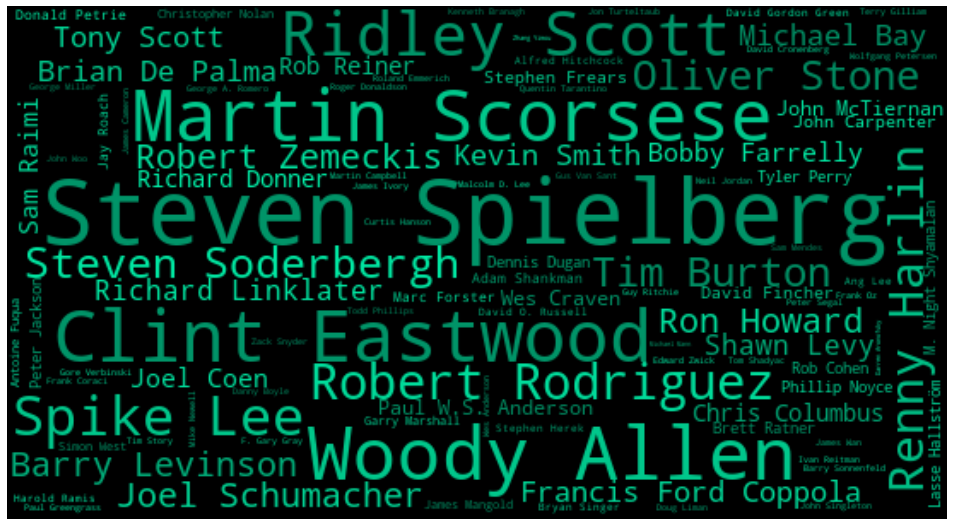

In [67]:
words = dict()
trunc_occurences = director_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 880 # define the color of the words
f, ax = plt.subplots(figsize=(15, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [68]:
top_dir = df_initial['director_name'].value_counts()
top_dir[:15]

Steven Spielberg     27
Woody Allen          21
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         16
Robert Rodriguez     16
Spike Lee            16
Steven Soderbergh    15
Renny Harlin         15
Tim Burton           14
Oliver Stone         14
Barry Levinson       13
Ron Howard           13
Joel Schumacher      13
Robert Zemeckis      13
Name: director_name, dtype: int64

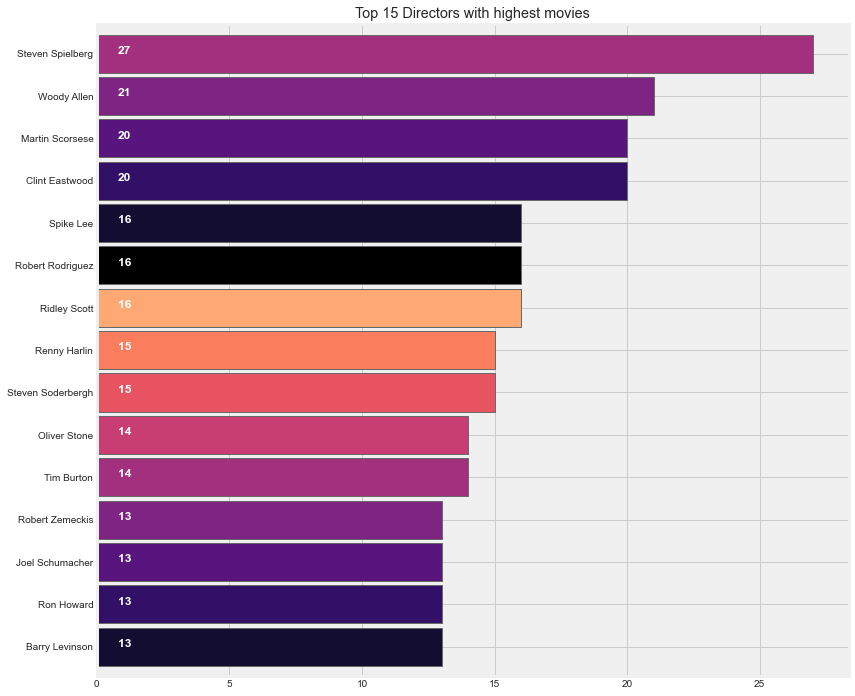

In [69]:
# Horizontal plot of the occurence of Directors
plt.subplots(figsize=(12,12))
ax = df_initial['director_name'].value_counts()[:15].sort_values(ascending=True). \
                            plot.barh(width=0.9,color=sns.color_palette("magma",10))

for i, v in enumerate(df_initial['director_name'].value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('k')
plt.title('Top 15 Directors with highest movies')
plt.show()

In [70]:
# Top 15 directors generating the highest revenue from a single movie they have directed
df_movies = df_initial['movie_title']
df_director = df_initial['director_name']
df_budget = df_initial['budget']
df_revenue = df_initial['revenue']

big_data_dir = pd.DataFrame(pd.concat([df_director, df_movies, df_budget, df_revenue], names=['director_name', 'movies_title', 'budget', 'revenue'], \
                                 sort=True, axis=1))
big_data_dir = big_data_dir.sort_values(by=["revenue"], ascending=False)
big_data_dir[:20]

,director_name,movie_title,budget,revenue
0,James Cameron,Avatar,237000000,2787965087
25,James Cameron,Titanic,200000000,1845034188
16,Joss Whedon,The Avengers,220000000,1519557910
28,Colin Trevorrow,Jurassic World,150000000,1513528810
44,James Wan,Furious 7,190000000,1506249360
7,Joss Whedon,Avengers: Age of Ultron,280000000,1405403694
124,Chris Buck,Frozen,150000000,1274219009
31,Shane Black,Iron Man 3,200000000,1215439994
546,Kyle Balda,Minions,74000000,1156730962
26,Anthony Russo,Captain America: Civil War,250000000,1153304495


In [71]:
# The top 10 directors generating highest revenue from a single movie and the number of movies they've Directed
top_dir.loc[['James Cameron','Joss Whedon', 'Colin Trevorrow', 'James Wan', 'Joss Whedon', 'Chris Buck', 'Shane Black', \
             'Kyle Balda', 'Anthony Russo', 'Michael Bay']]

James Cameron       7
Joss Whedon         3
Colin Trevorrow     2
James Wan           7
Joss Whedon         3
Chris Buck          1
Shane Black         2
Kyle Balda          1
Anthony Russo       4
Michael Bay        12
Name: director_name, dtype: int64

In [72]:
least_dir = df_initial['director_name'].value_counts()
least_dir[-20:]

Barnaby Thompson       1
Cristian Mungiu        1
Dito Montiel           1
Kief Davidson          1
Nadine Labaki          1
Tim Boxell             1
Leslie H. Martinson    1
Gregory Nava           1
Sylvio Tabet           1
Wayne Thornley         1
Mark Neveldine         1
Herbert Ross           1
Daniel Mellitz         1
Benni Diez             1
Joe Cornish            1
Blaž Završnik          1
Christian Carion       1
Stephen Hillenburg     1
Laurent Cantet         1
Andrew Steggall        1
Name: director_name, dtype: int64

### Cast

- Number of Occurence of actors

In [73]:
df_initial['cast']

0       [{'cast_id': 242, 'character': 'Jake Sully', '...
1       [{'cast_id': 4, 'character': 'Captain Jack Spa...
2       [{'cast_id': 1, 'character': 'James Bond', 'cr...
3       [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
4       [{'cast_id': 5, 'character': 'John Carter', 'c...
                              ...                        
4798    [{'cast_id': 1, 'character': 'El Mariachi', 'c...
4799    [{'cast_id': 1, 'character': 'Buzzy', 'credit_...
4800    [{'cast_id': 8, 'character': 'Oliver O’Toole',...
4801    [{'cast_id': 3, 'character': 'Sam', 'credit_id...
4802    [{'cast_id': 3, 'character': 'Herself', 'credi...
Name: cast, Length: 4803, dtype: object

In [74]:
# changing the cast column from json to string
# df_initial['cast'] = df_initial[['cast']].astype(str).apply(json.loads)
for index,i in zip(df_initial.index, df_initial['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df_initial.loc[index,'cast']=str(list1)

In [75]:
df_initial['cast'] = df_initial['cast'].astype(str).str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df_initial['cast'] = df_initial['cast'].astype(str).str.split(',')

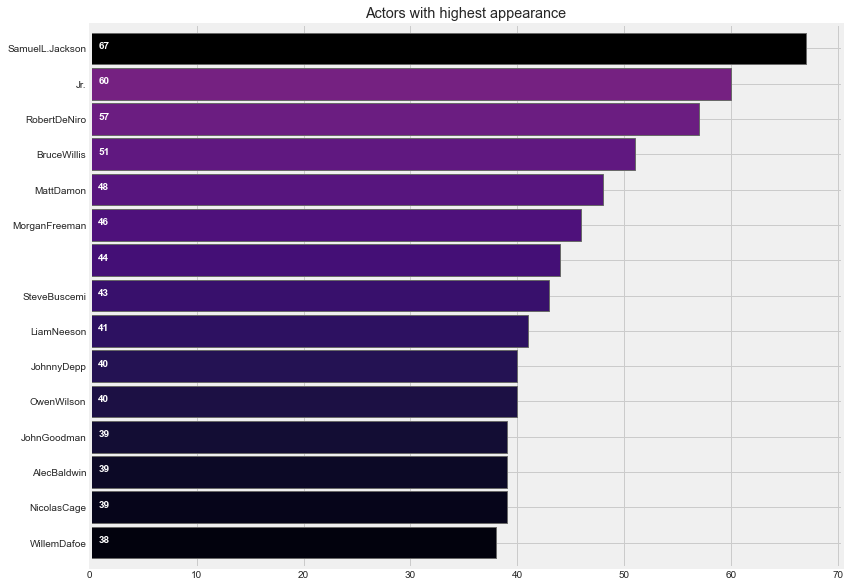

In [76]:
plt.subplots(figsize=(12,10))
list1=[]
for i in df_initial['cast']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('magma',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
    
plt.title('Actors with highest appearance')
ax.patches[14].set_facecolor('k')
plt.show()

In [77]:
df_1 = df_initial['actor_1_name'].value_counts()[:10]
df_1

Jennifer Aniston      15
Morgan Freeman        13
Samuel L. Jackson     12
Brad Pitt             12
Scarlett Johansson    11
Alec Baldwin          11
Diane Keaton          11
Robert De Niro        11
Matt Damon            10
Josh Hutcherson       10
Name: actor_1_name, dtype: int64

In [78]:
act1_labels = set()
for s in df_initial['actor_1_name'].astype(str).str.split(',').values:
    act1_labels = act1_labels.union(set(s))

# counting how many times each of them occur:
act1_occurences, dum = count_word(df_initial,'actor_1_name', act1_labels)
act1_occurences[:5]

[['Jennifer Aniston', 15],
 ['Morgan Freeman', 13],
 ['Brad Pitt', 12],
 ['Samuel L. Jackson', 12],
 ['Scarlett Johansson', 11]]

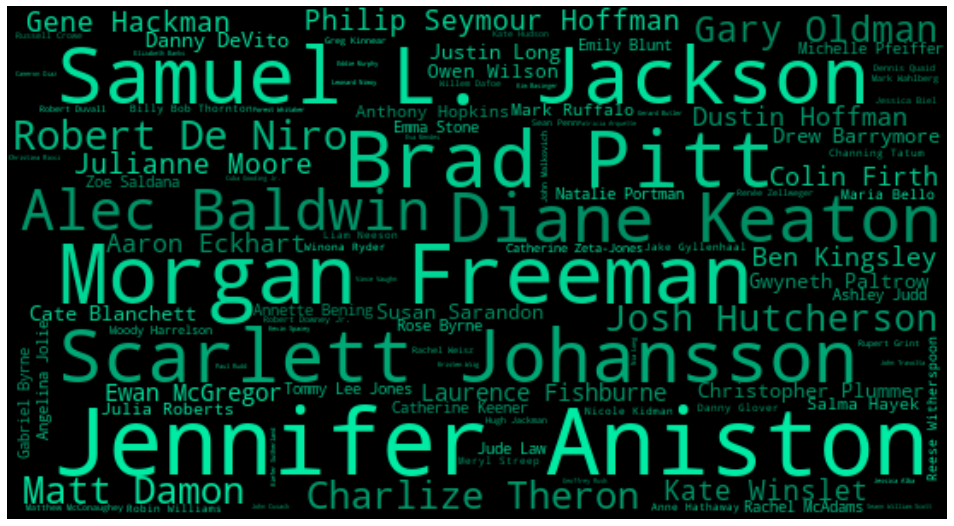

In [79]:
words = dict()
trunc_occurences = act1_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 880 # define the color of the words
f, ax = plt.subplots(figsize=(15, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

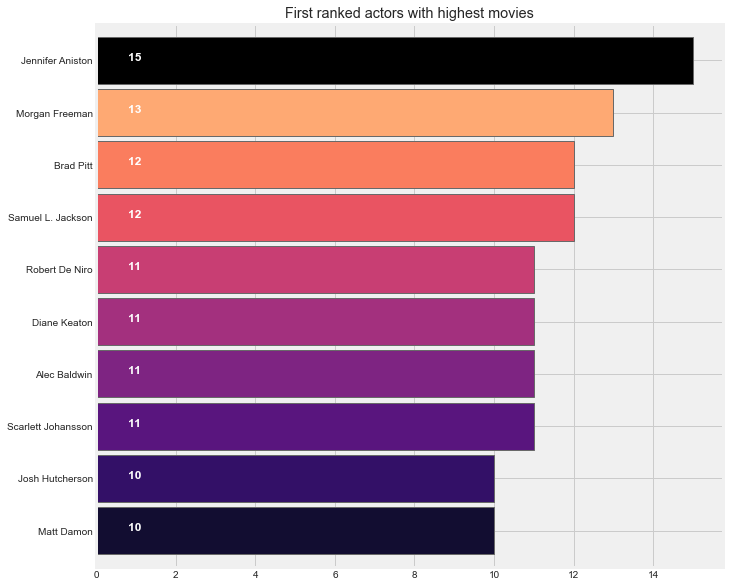

In [80]:
# Horizontal plot of the occurence of Directors
plt.subplots(figsize=(10,10))
ax = df_initial['actor_1_name'].value_counts()[:10].sort_values(ascending=True). \
                            plot.barh(width=0.9,color=sns.color_palette("magma",10))

for i, v in enumerate(df_initial['actor_1_name'].value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('k')
plt.title('First ranked actors with highest movies')
plt.show()

In [81]:
df_2 = df_initial['actor_2_name'].value_counts()[:10]
df_2

Ed Harris            9
Cameron Diaz         9
Marisa Tomei         9
Josh Brolin          8
Samuel L. Jackson    8
John Goodman         8
Kevin Bacon          8
Emma Watson          8
Forest Whitaker      8
Susan Sarandon       8
Name: actor_2_name, dtype: int64

In [82]:
act2_labels = set()
for s in df_initial['actor_2_name'].astype(str).str.split(',').values:
    act2_labels = act2_labels.union(set(s))

# counting how many times each of them occur:
act2_occurences, dum = count_word(df_initial,'actor_2_name', act2_labels)
act2_occurences[:5]

[['Ed Harris', 9],
 ['Cameron Diaz', 9],
 ['Marisa Tomei', 9],
 ['Mark Ruffalo', 8],
 ['Josh Brolin', 8]]

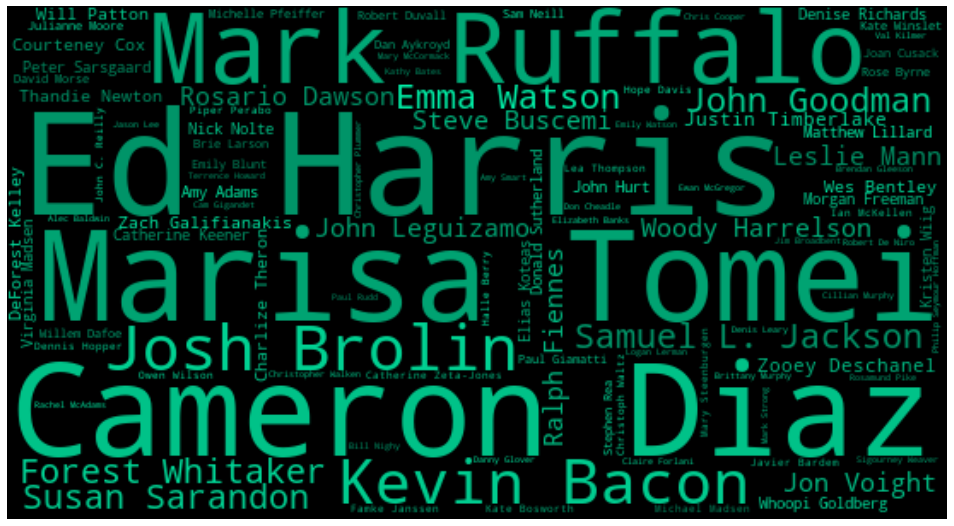

In [83]:
words = dict()
trunc_occurences = act2_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 880 # define the color of the words
f, ax = plt.subplots(figsize=(15, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

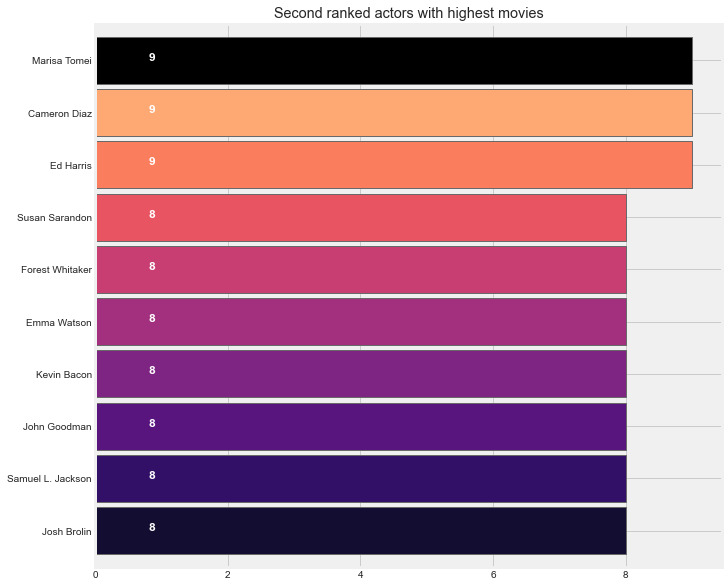

In [84]:
# Horizontal plot of the occurence of Directors
plt.subplots(figsize=(10,10))
ax = df_initial['actor_2_name'].value_counts()[:10].sort_values(ascending=True). \
                            plot.barh(width=0.9,color=sns.color_palette("magma",10))

for i, v in enumerate(df_initial['actor_2_name'].value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('k')
plt.title('Second ranked actors with highest movies')
plt.show()

In [85]:
df_initial['actor_3_name'].value_counts()

Woody Harrelson      10
David Koechner        8
Jim Broadbent         8
Alfred Molina         8
Vincent D'Onofrio     8
                     ..
Roslyn Ruff           1
Isabelle Huppert      1
Russell Brand         1
Zhang Jia-Yi          1
Ray Walston           1
Name: actor_3_name, Length: 3372, dtype: int64

In [86]:
act3_labels = set()
for s in df_initial['actor_3_name'].astype(str).str.split(',').values:
    act3_labels = act3_labels.union(set(s))

# counting how many times each of them occur:
act3_occurences, dum = count_word(df_initial,'actor_3_name', act3_labels)
act3_occurences[:5]

[['Woody Harrelson', 10],
 ["Vincent D'Onofrio", 8],
 ['David Koechner', 8],
 ['Alfred Molina', 8],
 ['Jim Broadbent', 8]]

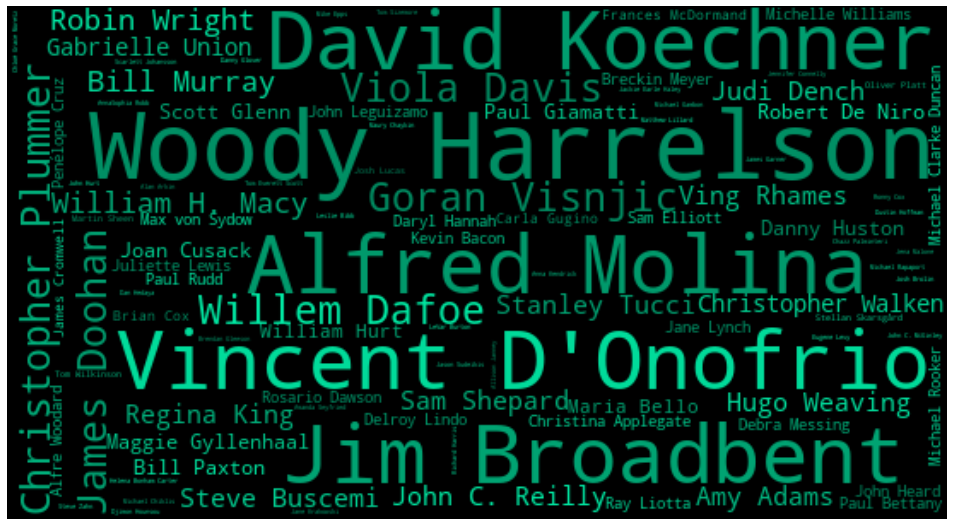

In [87]:
words = dict()
trunc_occurences = act3_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 880 # define the color of the words
f, ax = plt.subplots(figsize=(15, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

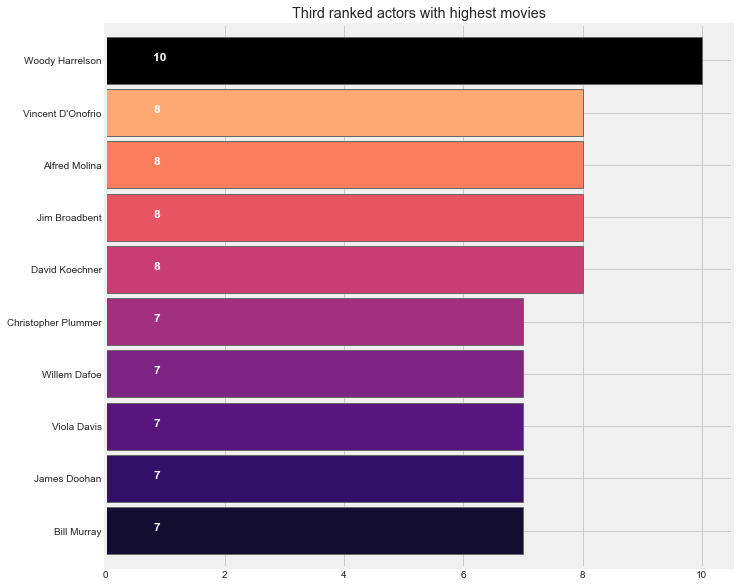

In [88]:
# Horizontal plot of the occurence of Directors
plt.subplots(figsize=(10,10))
ax = df_initial['actor_3_name'].value_counts()[:10].sort_values(ascending=True). \
                            plot.barh(width=0.9,color=sns.color_palette("magma",10))

for i, v in enumerate(df_initial['actor_3_name'].value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('k')
plt.title('Third ranked actors with highest movies')
plt.show()

### budget

- Which Budget got the highest ROI
- What percentage of the Budget was gotten back
- Did we make profit or Loss from our Budget
- What Movies got the Highest Budget 

In [89]:
df_initial['budget'][:10]

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
5    258000000
6    260000000
7    280000000
8    250000000
9    250000000
Name: budget, dtype: int64

In [91]:
# Top 15 Budgets generating the highest revenue.
df_budget = df_initial['budget']
df_revenue = df_initial['revenue']

budget = pd.DataFrame(pd.concat([df_budget, df_revenue], names=['budget', 'revenue'], sort=True, axis=1))
budget = budget.sort_values(by=["revenue"], ascending=False)
budget[:20]

,budget,revenue
0,237000000,2787965087
25,200000000,1845034188
16,220000000,1519557910
28,150000000,1513528810
44,190000000,1506249360
7,280000000,1405403694
124,150000000,1274219009
31,200000000,1215439994
546,74000000,1156730962
26,250000000,1153304495


<AxesSubplot:xlabel='budget'>

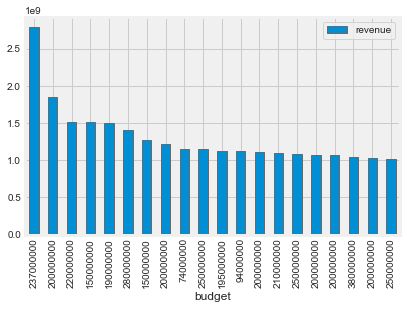

In [92]:
budget[:20].plot(x='budget', y='revenue', kind='bar')

#### Movies and Budgets with High Return On Investment

In [109]:
# Top 15 Movies and Budgets with High Return on Investment
df_budget = budget
df_budget['movie_title'] = df_initial['movie_title']
df_budget['% ROI'] = (df_budget['revenue'] / df_budget['budget']) - 1
df_budget[:15].sort_values(by=["% ROI"], ascending=False)

,budget,revenue,movie_title,% ROI
546,74000000,1156730962,Minions,14.631499
329,94000000,1118888979,The Lord of the Rings: The Return of the King,10.903074
0,237000000,2787965087,Avatar,10.763566
28,150000000,1513528810,Jurassic World,9.090192
25,200000000,1845034188,Titanic,8.225171
124,150000000,1274219009,Frozen,7.494793
44,190000000,1506249360,Furious 7,6.927628
16,220000000,1519557910,The Avengers,5.907081
31,200000000,1215439994,Iron Man 3,5.077200
52,195000000,1123746996,Transformers: Dark of the Moon,4.762805


In [106]:
# Top 15 Movies and Budgets with High Return on Investment
df_budget = budget
df_budget['movie_title'] = df_initial['movie_title']
df_budget['% ROI'] = (df_budget['revenue'] - df_budget['budget']) / df_budget['budget']
df_budget[:15].sort_values(by=["% ROI"], ascending=False)

,budget,revenue,movie_title,% ROI
546,74000000,1156730962,Minions,14.631499
329,94000000,1118888979,The Lord of the Rings: The Return of the King,10.903074
0,237000000,2787965087,Avatar,10.763566
28,150000000,1513528810,Jurassic World,9.090192
25,200000000,1845034188,Titanic,8.225171
124,150000000,1274219009,Frozen,7.494793
44,190000000,1506249360,Furious 7,6.927628
16,220000000,1519557910,The Avengers,5.907081
31,200000000,1215439994,Iron Man 3,5.077200
52,195000000,1123746996,Transformers: Dark of the Moon,4.762805


In [110]:
# Movies and Budgets with Lowest Return on Investment
df_budget[-15:]

,budget,revenue,movie_title,% ROI
3221,8000000,0,실미도,-1.0
3220,0,0,The Haunting in Connecticut 2: Ghosts of Georgia,NaN
3216,0,0,Election,NaN
3215,0,0,Håkon Håkonsen,NaN
3209,9000000,0,Skin Trade,-1.0
3208,0,0,Star Wars: Clone Wars (Volume 1),NaN
3205,7347125,0,Beneath Hill 60,-1.0
3204,8800000,0,The I Inside,-1.0
3203,0,0,"Ultramarines: A Warhammer 40,000 Movie",NaN
3201,9000000,0,Veronika Decides to Die,-1.0


#### Movies with High Budgets and their Respective Return on Investment

In [114]:
df_budget = budget
df_budget['movie_title'] = df_initial['movie_title']
df_budget['% ROI'] = (df_budget['revenue'] - df_budget['budget']) / df_budget['budget']
df_budget[:20].sort_values(by=["budget"], ascending=False)

,budget,revenue,movie_title,% ROI
17,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides,1.751878
1,300000000,961000000,Pirates of the Caribbean: At World's End,2.203333
7,280000000,1405403694,Avengers: Age of Ultron,4.019299
10,270000000,391081192,Superman Returns,0.448449
4,260000000,284139100,John Carter,0.092843
6,260000000,591794936,Tangled,1.276134
5,258000000,890871626,Spider-Man 3,2.452991
13,255000000,89289910,The Lone Ranger,-0.649843
98,250000000,1021103568,The Hobbit: An Unexpected Journey,3.084414
3,250000000,1084939099,The Dark Knight Rises,3.339756


### Release Date

In [115]:
df_initial['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [142]:
df_initial['release_month']

0       12.0
1        5.0
2       10.0
3        7.0
4        3.0
        ... 
4798     9.0
4799    12.0
4800    10.0
4801     5.0
4802     8.0
Name: release_month, Length: 4803, dtype: float64

- Check for how much Revenue each Month genereated, use a plt graph to illustrate this
- Check for which month got the highest Revenue
- 

### Crew

### Production Countries